In [2]:
#변수설명
#CLIENTNUM :고객 번호
#Attrition_Flag : 고객활동 변수, Existing : 유지고객 Attrited : 이탈고객
#Customer_Age : 고객의 연령
#Gender : 성별
#Dependent_count : 부양 가족 수
#Education_Lebel : 최종 학력
#Marital_Status : 결혼 여부
#Income_Category : 고객의 수입
#Card_Category : 카드의 종류
#Months_on_book : 은행 회원가입 이래로 현재까지의 기간
#Total_Relationship_Count : 고객의 금융상품 수
#Months_Inactive_12_mon : 지난 12개월 중 활동하지 않은 개월의 수
#Contacts_Count_12_mon : 지난 12개월 동안 은행과 연락한 횟수
#Credit_Limit : 신용한도액
#Total_Revolving_Bal : 신용카드의 총 회전 잔액
#Avg_Open_To_Buy : 12개월간 평균 신용카드 구매 가능액
#Total_Amt_Chng_Q4_Q1 : 거래 변동 금액(1분기-4분기)
#Total_Trans_Amt : 총 거래 금액
#Total_Trans_Ct : 총 거래 수
#Total_Ct_Chng_Q4_Q1 : 거래 건수 변동(1분기-4분기)
#Avg_Utilization_Ratio : 평균 카드 사용률
#Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
#Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
#바로 위 두 변수는 나이브 베이지안을 활용한 분류 결과

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data=pd.read_csv("BankChurners.csv",header=0)
data2=data.copy()
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data.shape[:]

(10127, 21)

In [5]:
data.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<AxesSubplot:>

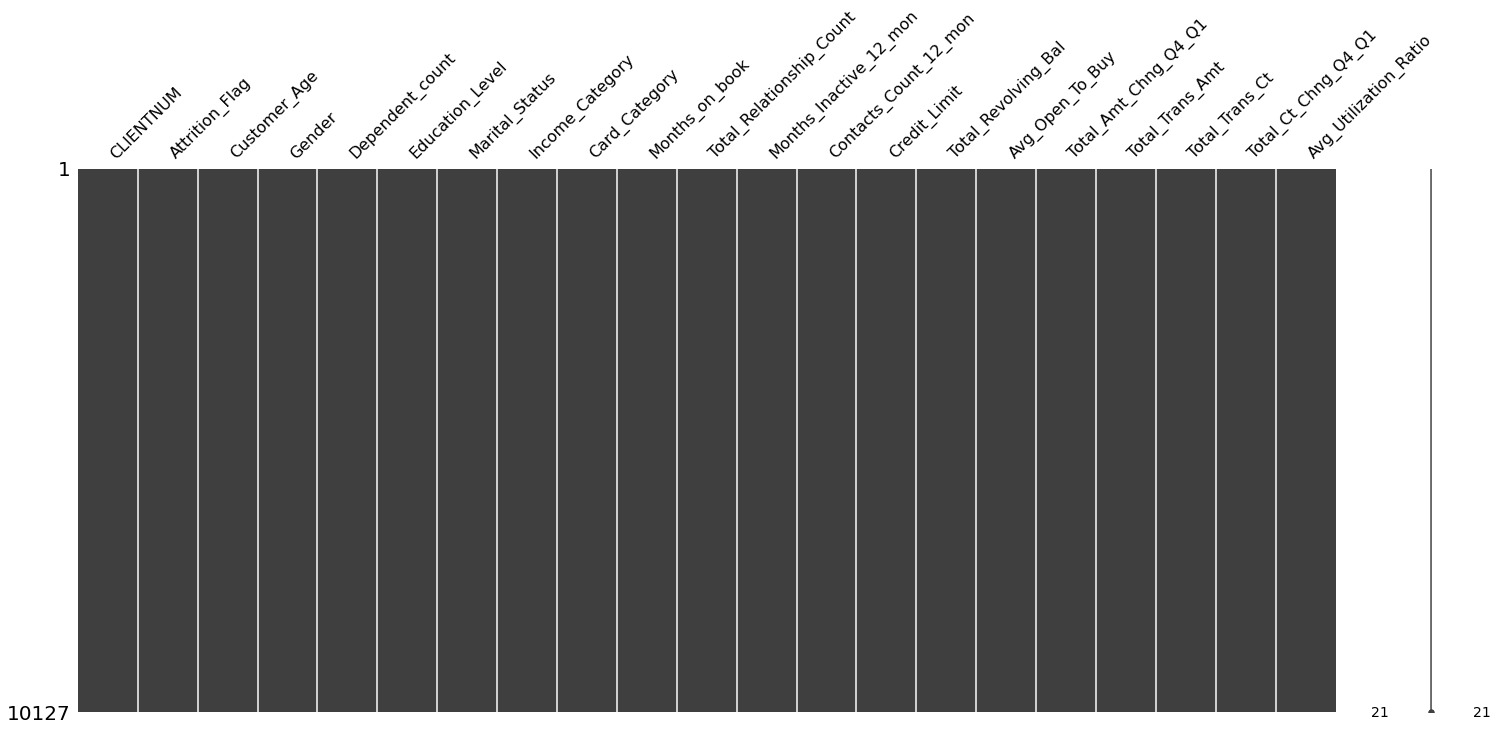

In [7]:
msno.matrix(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA

In [9]:
data.describe(include=['int','float'])

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
data.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


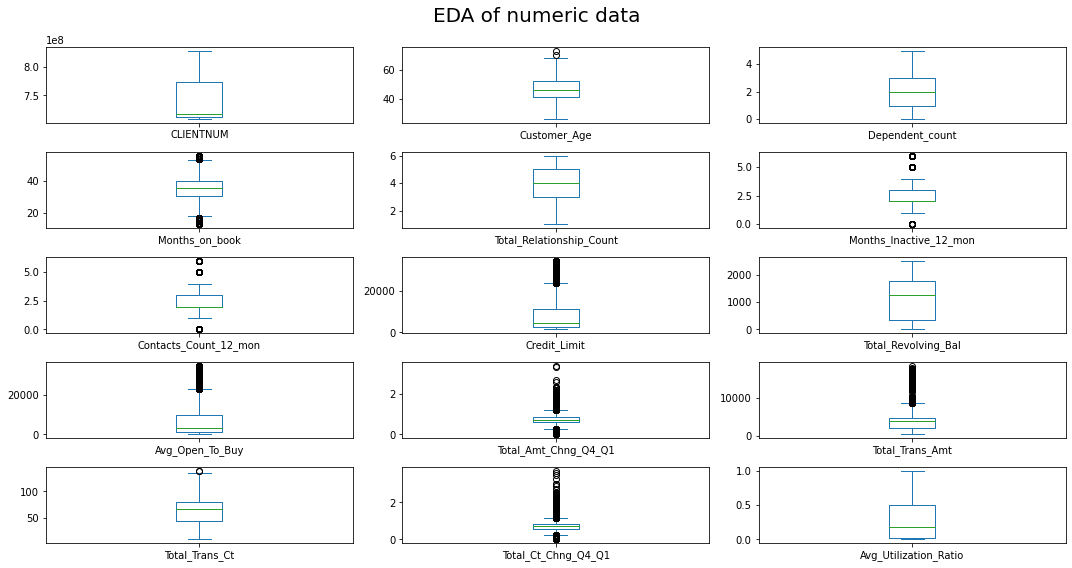

In [11]:
data.plot(kind='box',subplots=True,layout=(5,3),figsize=(15,8))
plt.suptitle('EDA of numeric data',fontsize=20)
plt.tight_layout()
plt.show()

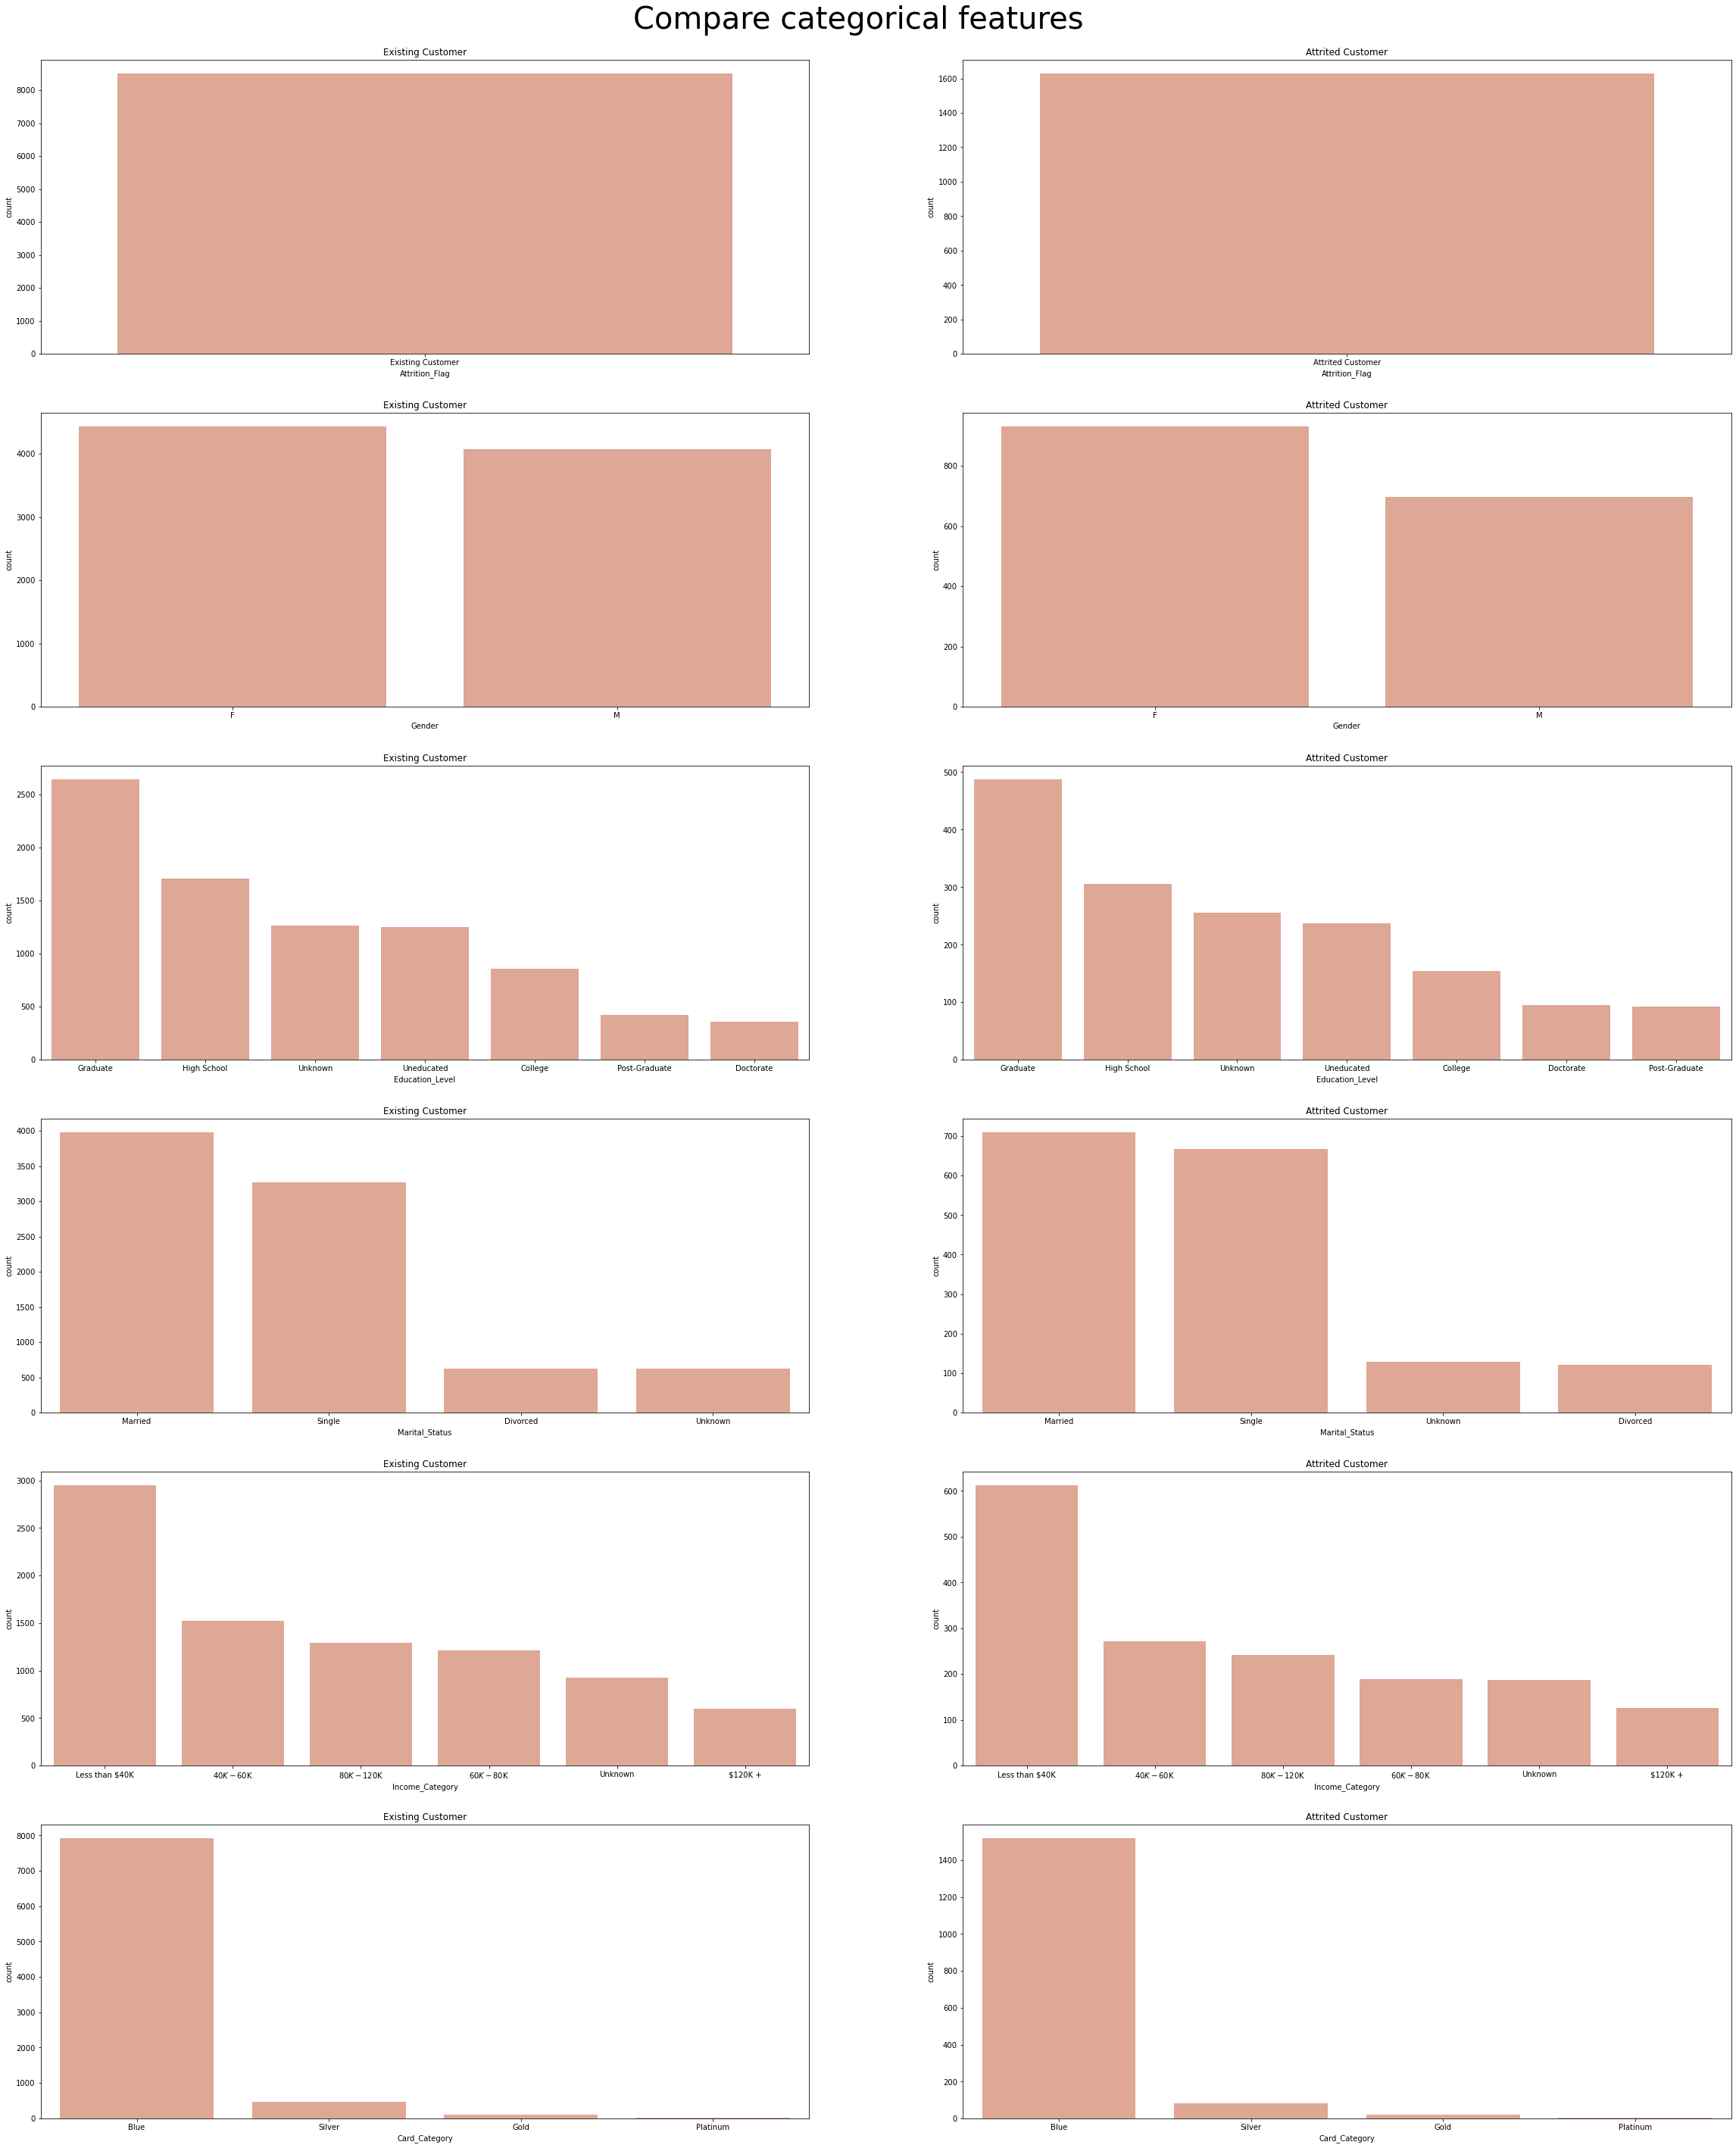

In [12]:
#소득 별 범주형 변수들의 차이
objcol=data.describe(include='object').columns
train_categori=data[objcol]


def visualize(axx,field,num):
    sns.countplot(train_categori.columns[num],data=train_categori[train_categori['Attrition_Flag']==field],order=train_categori[train_categori['Attrition_Flag']==field][train_categori.columns[num]].value_counts().index,color='#eaa18a',ax=axx)
    axx.set_title(field)
    
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12))=plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(40,50)
fig.suptitle('Compare categorical features',fontsize=40,y=0.9)

k=0
j=1
while k<6:
    for i in range(0,2):
        visualize(eval(f'ax{j}'),train_categori['Attrition_Flag'].unique()[i],k)
        j=j+1
    k=k+1

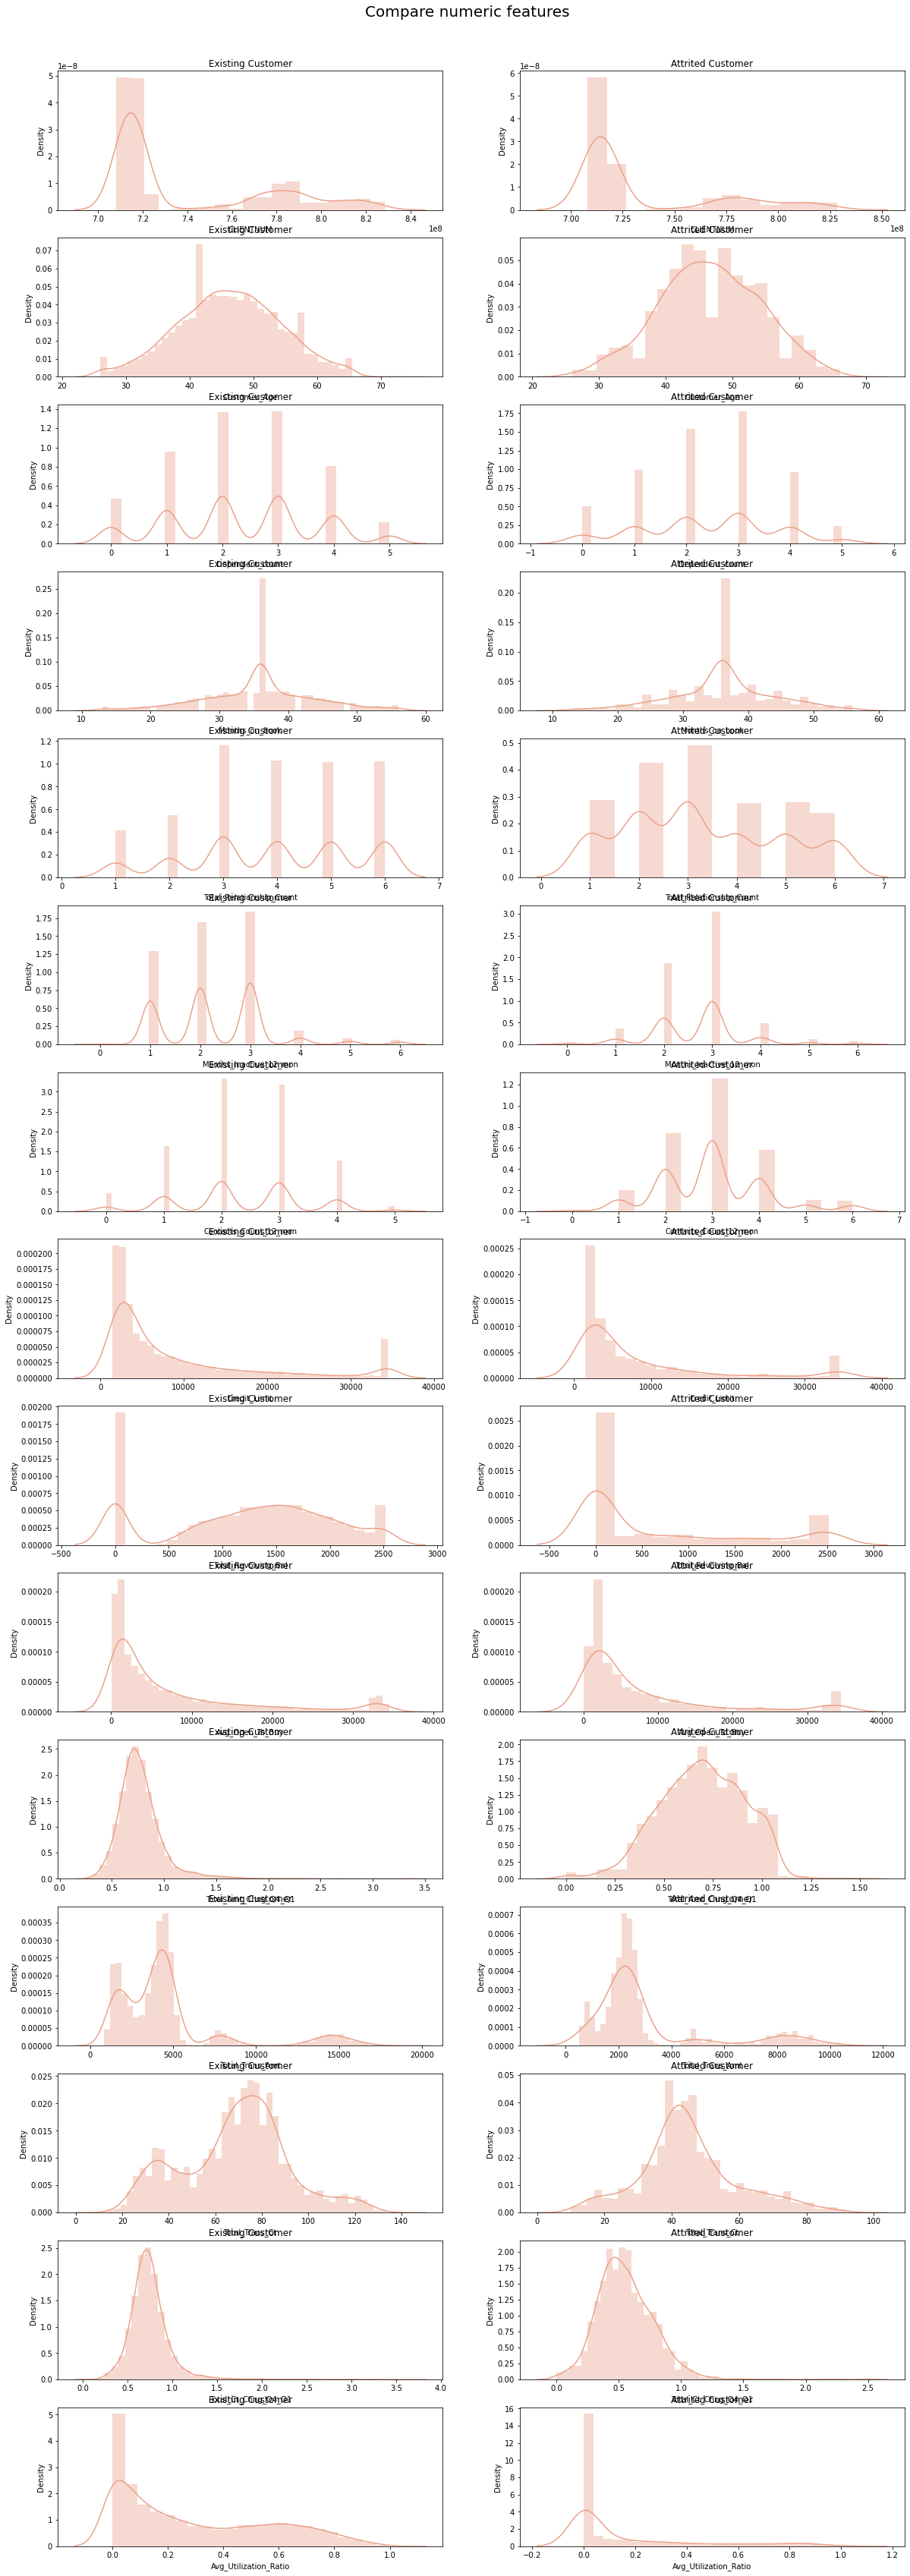

In [13]:
def visualize_line(axx,field,num):
    numcol=data.describe(include=['int','float']).columns
    line=data[numcol][data['Attrition_Flag']==field]
    sns.distplot(line[numcol[num]],color='#eaa18a',ax=axx)
    axx.set_title(field)

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20),(ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28),(ax29,ax30))=plt.subplots(nrows=15,ncols=2)
fig.set_size_inches(20,60)    
fig.suptitle('Compare numeric features',fontsize=20,y=0.9)

k=0
j=1
while(k<15):
    for i in range(0,2):
        visualize_line(eval(f'ax{j}'),data['Attrition_Flag'].unique()[i],k)
        j=j+1
    k=k+1

In [14]:
numcol=data.describe(include=['int','float']).columns

<AxesSubplot:>

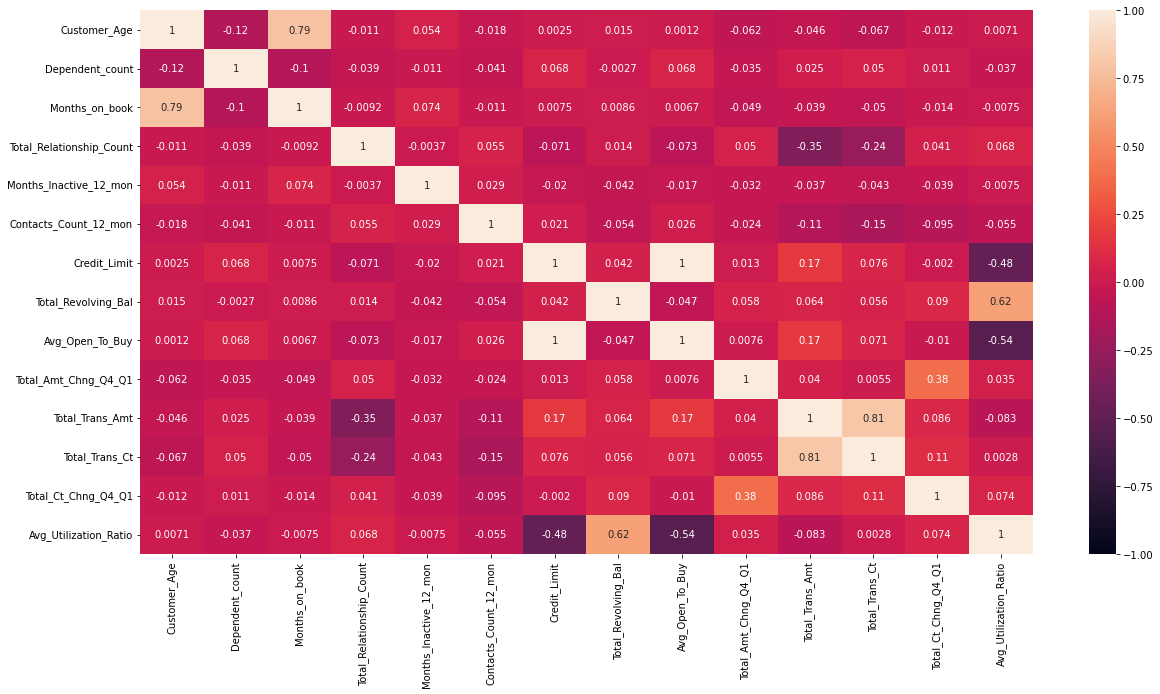

In [15]:
cordata=data[numcol].drop('CLIENTNUM',axis=1)
cormat=cordata.corr()

plt.figure(figsize=(20,10))
sns.heatmap(cormat,annot=True,vmax=1,vmin=-1)

In [16]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

## Data Preprocessing

In [17]:
Attrition_Flag_cat={'Existing Customer':0,'Attrited Customer':1}
data['Attrition_Flag']=data['Attrition_Flag'].map(Attrition_Flag_cat)

Education_Level_cat={'Unknown':0,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
data['Education_Level']=data['Education_Level'].map(Education_Level_cat)

Income_Category_cat={'Unknown':0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
data['Income_Category']=data['Income_Category'].map(Income_Category_cat)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[numcol]=scaler.fit_transform(data[numcol])

In [19]:
data=pd.get_dummies(data)

In [20]:
data=data.drop(['CLIENTNUM','Months_on_book','Total_Trans_Ct','Avg_Open_To_Buy'],axis=1)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
y=data['Attrition_Flag']
X=data.drop(['Attrition_Flag'],axis=1)

In [23]:
smote=SMOTE()
X_sm,y_sm=smote.fit_resample(X,y)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm)

In [44]:
import time
timer=[]
def models2(models):
    first=time.time()
    model=models()
    model.fit(X_train,y_train)
    time1=time.time()-first
    timer.append(time1)
    pred=model.predict(X_test)
    return accuracy_score(y_test,pred)

In [45]:
score=[]
models=[RandomForestClassifier,LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier,XGBClassifier,LGBMClassifier,CatBoostClassifier]
for model in models:
    score.append(models2(model))

Learning rate set to 0.031402
0:	learn: 0.6588387	total: 11.3ms	remaining: 11.3s
1:	learn: 0.6264437	total: 22.5ms	remaining: 11.2s
2:	learn: 0.5994239	total: 33.6ms	remaining: 11.2s
3:	learn: 0.5730829	total: 44.7ms	remaining: 11.1s
4:	learn: 0.5478257	total: 55.6ms	remaining: 11.1s
5:	learn: 0.5265766	total: 66.3ms	remaining: 11s
6:	learn: 0.5070684	total: 76ms	remaining: 10.8s
7:	learn: 0.4906921	total: 86.7ms	remaining: 10.8s
8:	learn: 0.4745291	total: 96.6ms	remaining: 10.6s
9:	learn: 0.4593289	total: 107ms	remaining: 10.6s
10:	learn: 0.4461617	total: 117ms	remaining: 10.5s
11:	learn: 0.4328659	total: 126ms	remaining: 10.4s
12:	learn: 0.4221307	total: 136ms	remaining: 10.4s
13:	learn: 0.4115760	total: 146ms	remaining: 10.3s
14:	learn: 0.4009709	total: 156ms	remaining: 10.3s
15:	learn: 0.3890830	total: 166ms	remaining: 10.2s
16:	learn: 0.3798896	total: 176ms	remaining: 10.2s
17:	learn: 0.3720670	total: 188ms	remaining: 10.3s
18:	learn: 0.3654022	total: 202ms	remaining: 10.4s
19:	le

172:	learn: 0.1183926	total: 1.81s	remaining: 8.68s
173:	learn: 0.1178370	total: 1.83s	remaining: 8.68s
174:	learn: 0.1174996	total: 1.84s	remaining: 8.67s
175:	learn: 0.1171052	total: 1.85s	remaining: 8.66s
176:	learn: 0.1167543	total: 1.86s	remaining: 8.65s
177:	learn: 0.1162115	total: 1.87s	remaining: 8.63s
178:	learn: 0.1159071	total: 1.88s	remaining: 8.62s
179:	learn: 0.1156602	total: 1.89s	remaining: 8.6s
180:	learn: 0.1154101	total: 1.9s	remaining: 8.59s
181:	learn: 0.1151053	total: 1.91s	remaining: 8.58s
182:	learn: 0.1148356	total: 1.92s	remaining: 8.56s
183:	learn: 0.1145770	total: 1.93s	remaining: 8.55s
184:	learn: 0.1143167	total: 1.94s	remaining: 8.54s
185:	learn: 0.1141480	total: 1.95s	remaining: 8.52s
186:	learn: 0.1136160	total: 1.96s	remaining: 8.51s
187:	learn: 0.1132424	total: 1.97s	remaining: 8.49s
188:	learn: 0.1129774	total: 1.98s	remaining: 8.48s
189:	learn: 0.1124412	total: 1.99s	remaining: 8.46s
190:	learn: 0.1121742	total: 2s	remaining: 8.45s
191:	learn: 0.111

349:	learn: 0.0773529	total: 3.6s	remaining: 6.7s
350:	learn: 0.0772287	total: 3.62s	remaining: 6.69s
351:	learn: 0.0771161	total: 3.63s	remaining: 6.68s
352:	learn: 0.0770410	total: 3.64s	remaining: 6.67s
353:	learn: 0.0769302	total: 3.65s	remaining: 6.66s
354:	learn: 0.0767316	total: 3.66s	remaining: 6.64s
355:	learn: 0.0766427	total: 3.67s	remaining: 6.63s
356:	learn: 0.0764035	total: 3.68s	remaining: 6.62s
357:	learn: 0.0762033	total: 3.69s	remaining: 6.61s
358:	learn: 0.0760115	total: 3.7s	remaining: 6.6s
359:	learn: 0.0758706	total: 3.71s	remaining: 6.59s
360:	learn: 0.0757868	total: 3.72s	remaining: 6.58s
361:	learn: 0.0756055	total: 3.73s	remaining: 6.57s
362:	learn: 0.0754913	total: 3.73s	remaining: 6.55s
363:	learn: 0.0754066	total: 3.75s	remaining: 6.54s
364:	learn: 0.0752797	total: 3.75s	remaining: 6.53s
365:	learn: 0.0751206	total: 3.76s	remaining: 6.52s
366:	learn: 0.0749591	total: 3.77s	remaining: 6.51s
367:	learn: 0.0748097	total: 3.78s	remaining: 6.5s
368:	learn: 0.074

525:	learn: 0.0566741	total: 5.38s	remaining: 4.85s
526:	learn: 0.0565637	total: 5.39s	remaining: 4.84s
527:	learn: 0.0565022	total: 5.41s	remaining: 4.83s
528:	learn: 0.0564496	total: 5.42s	remaining: 4.82s
529:	learn: 0.0563486	total: 5.43s	remaining: 4.81s
530:	learn: 0.0562460	total: 5.44s	remaining: 4.8s
531:	learn: 0.0561607	total: 5.45s	remaining: 4.79s
532:	learn: 0.0560810	total: 5.46s	remaining: 4.78s
533:	learn: 0.0560136	total: 5.46s	remaining: 4.77s
534:	learn: 0.0559587	total: 5.47s	remaining: 4.76s
535:	learn: 0.0558599	total: 5.48s	remaining: 4.75s
536:	learn: 0.0558125	total: 5.49s	remaining: 4.74s
537:	learn: 0.0556890	total: 5.5s	remaining: 4.73s
538:	learn: 0.0556460	total: 5.51s	remaining: 4.71s
539:	learn: 0.0555760	total: 5.52s	remaining: 4.7s
540:	learn: 0.0555273	total: 5.53s	remaining: 4.69s
541:	learn: 0.0554644	total: 5.54s	remaining: 4.68s
542:	learn: 0.0554102	total: 5.55s	remaining: 4.67s
543:	learn: 0.0553153	total: 5.56s	remaining: 4.66s
544:	learn: 0.0

700:	learn: 0.0452630	total: 7.14s	remaining: 3.04s
701:	learn: 0.0452151	total: 7.15s	remaining: 3.03s
702:	learn: 0.0451757	total: 7.16s	remaining: 3.02s
703:	learn: 0.0450958	total: 7.17s	remaining: 3.01s
704:	learn: 0.0450301	total: 7.18s	remaining: 3s
705:	learn: 0.0449882	total: 7.19s	remaining: 2.99s
706:	learn: 0.0449420	total: 7.2s	remaining: 2.98s
707:	learn: 0.0449061	total: 7.21s	remaining: 2.97s
708:	learn: 0.0448423	total: 7.22s	remaining: 2.96s
709:	learn: 0.0448115	total: 7.23s	remaining: 2.95s
710:	learn: 0.0447404	total: 7.24s	remaining: 2.94s
711:	learn: 0.0447176	total: 7.25s	remaining: 2.93s
712:	learn: 0.0446364	total: 7.25s	remaining: 2.92s
713:	learn: 0.0445882	total: 7.26s	remaining: 2.91s
714:	learn: 0.0445405	total: 7.27s	remaining: 2.9s
715:	learn: 0.0444814	total: 7.28s	remaining: 2.89s
716:	learn: 0.0444423	total: 7.29s	remaining: 2.88s
717:	learn: 0.0443646	total: 7.3s	remaining: 2.87s
718:	learn: 0.0443210	total: 7.31s	remaining: 2.86s
719:	learn: 0.0442

860:	learn: 0.0373703	total: 8.73s	remaining: 1.41s
861:	learn: 0.0373216	total: 8.74s	remaining: 1.4s
862:	learn: 0.0372847	total: 8.75s	remaining: 1.39s
863:	learn: 0.0372324	total: 8.76s	remaining: 1.38s
864:	learn: 0.0372106	total: 8.77s	remaining: 1.37s
865:	learn: 0.0371793	total: 8.78s	remaining: 1.36s
866:	learn: 0.0371327	total: 8.79s	remaining: 1.35s
867:	learn: 0.0370995	total: 8.8s	remaining: 1.34s
868:	learn: 0.0370823	total: 8.81s	remaining: 1.33s
869:	learn: 0.0370430	total: 8.82s	remaining: 1.32s
870:	learn: 0.0370122	total: 8.83s	remaining: 1.31s
871:	learn: 0.0369777	total: 8.84s	remaining: 1.3s
872:	learn: 0.0369339	total: 8.85s	remaining: 1.29s
873:	learn: 0.0369171	total: 8.86s	remaining: 1.28s
874:	learn: 0.0368733	total: 8.87s	remaining: 1.27s
875:	learn: 0.0368241	total: 8.88s	remaining: 1.26s
876:	learn: 0.0367718	total: 8.89s	remaining: 1.25s
877:	learn: 0.0367350	total: 8.9s	remaining: 1.24s
878:	learn: 0.0366936	total: 8.91s	remaining: 1.23s
879:	learn: 0.03

In [46]:
accu=pd.DataFrame(score,index=['RandomForest','LogisticRegression','SVM','DecisionTree','KNN','XGBoost','LightGBM','CatBoost'],columns=['정확도']).reset_index()

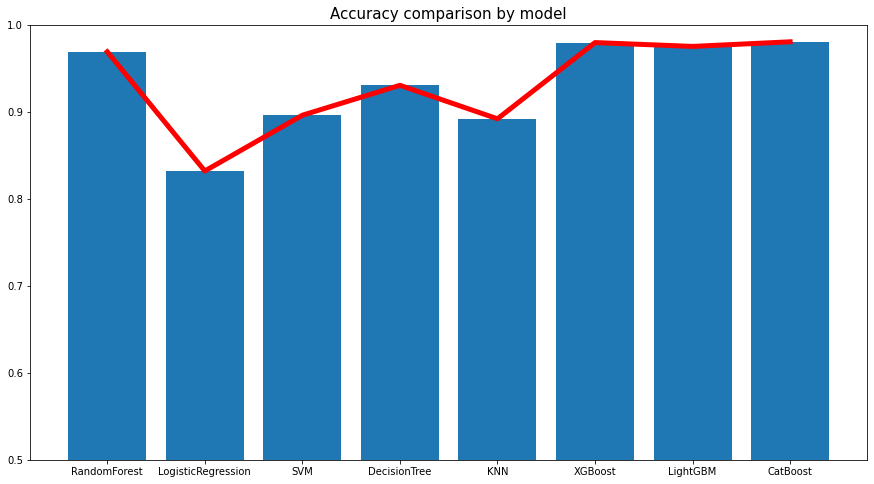

In [47]:
plt.figure(figsize=(15,8))
plt.title('Accuracy comparison by model',fontsize=15)
plt.ylim(0.5,1)
plt.bar(accu['index'],accu['정확도'])
plt.plot(accu['index'],accu['정확도'],color='red',linewidth=5)

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model=CatBoostClassifier()
model.fit(X_train,y_train)

pred=model.predict(X_test)

Learning rate set to 0.031402
0:	learn: 0.6588387	total: 13.2ms	remaining: 13.2s
1:	learn: 0.6264437	total: 23.4ms	remaining: 11.7s
2:	learn: 0.5994239	total: 34.2ms	remaining: 11.4s
3:	learn: 0.5730829	total: 44.8ms	remaining: 11.2s
4:	learn: 0.5478257	total: 55.2ms	remaining: 11s
5:	learn: 0.5265766	total: 65.5ms	remaining: 10.9s
6:	learn: 0.5070684	total: 75.3ms	remaining: 10.7s
7:	learn: 0.4906921	total: 85.1ms	remaining: 10.5s
8:	learn: 0.4745291	total: 95ms	remaining: 10.5s
9:	learn: 0.4593289	total: 105ms	remaining: 10.4s
10:	learn: 0.4461617	total: 115ms	remaining: 10.3s
11:	learn: 0.4328659	total: 124ms	remaining: 10.2s
12:	learn: 0.4221307	total: 135ms	remaining: 10.2s
13:	learn: 0.4115760	total: 145ms	remaining: 10.2s
14:	learn: 0.4009709	total: 154ms	remaining: 10.1s
15:	learn: 0.3890830	total: 164ms	remaining: 10.1s
16:	learn: 0.3798896	total: 174ms	remaining: 10s
17:	learn: 0.3720670	total: 184ms	remaining: 10s
18:	learn: 0.3654022	total: 195ms	remaining: 10.1s
19:	learn:

167:	learn: 0.1200171	total: 2.16s	remaining: 10.7s
168:	learn: 0.1195495	total: 2.18s	remaining: 10.7s
169:	learn: 0.1191707	total: 2.2s	remaining: 10.7s
170:	learn: 0.1189227	total: 2.21s	remaining: 10.7s
171:	learn: 0.1186094	total: 2.23s	remaining: 10.7s
172:	learn: 0.1183926	total: 2.25s	remaining: 10.8s
173:	learn: 0.1178370	total: 2.27s	remaining: 10.8s
174:	learn: 0.1174996	total: 2.29s	remaining: 10.8s
175:	learn: 0.1171052	total: 2.3s	remaining: 10.8s
176:	learn: 0.1167543	total: 2.31s	remaining: 10.8s
177:	learn: 0.1162115	total: 2.33s	remaining: 10.7s
178:	learn: 0.1159071	total: 2.34s	remaining: 10.7s
179:	learn: 0.1156602	total: 2.35s	remaining: 10.7s
180:	learn: 0.1154101	total: 2.36s	remaining: 10.7s
181:	learn: 0.1151053	total: 2.37s	remaining: 10.7s
182:	learn: 0.1148356	total: 2.39s	remaining: 10.7s
183:	learn: 0.1145770	total: 2.4s	remaining: 10.6s
184:	learn: 0.1143167	total: 2.41s	remaining: 10.6s
185:	learn: 0.1141480	total: 2.42s	remaining: 10.6s
186:	learn: 0.1

327:	learn: 0.0809482	total: 4.33s	remaining: 8.86s
328:	learn: 0.0808078	total: 4.34s	remaining: 8.85s
329:	learn: 0.0807108	total: 4.35s	remaining: 8.84s
330:	learn: 0.0806036	total: 4.38s	remaining: 8.86s
331:	learn: 0.0804509	total: 4.39s	remaining: 8.84s
332:	learn: 0.0803457	total: 4.41s	remaining: 8.83s
333:	learn: 0.0800818	total: 4.42s	remaining: 8.81s
334:	learn: 0.0799426	total: 4.43s	remaining: 8.79s
335:	learn: 0.0798404	total: 4.44s	remaining: 8.77s
336:	learn: 0.0797159	total: 4.45s	remaining: 8.75s
337:	learn: 0.0794288	total: 4.46s	remaining: 8.73s
338:	learn: 0.0791391	total: 4.47s	remaining: 8.72s
339:	learn: 0.0788998	total: 4.48s	remaining: 8.7s
340:	learn: 0.0787747	total: 4.49s	remaining: 8.68s
341:	learn: 0.0786414	total: 4.5s	remaining: 8.67s
342:	learn: 0.0783630	total: 4.52s	remaining: 8.65s
343:	learn: 0.0782618	total: 4.53s	remaining: 8.64s
344:	learn: 0.0780781	total: 4.54s	remaining: 8.62s
345:	learn: 0.0779536	total: 4.56s	remaining: 8.61s
346:	learn: 0.

499:	learn: 0.0590974	total: 6.52s	remaining: 6.52s
500:	learn: 0.0590042	total: 6.53s	remaining: 6.51s
501:	learn: 0.0589323	total: 6.54s	remaining: 6.49s
502:	learn: 0.0588645	total: 6.56s	remaining: 6.48s
503:	learn: 0.0587494	total: 6.57s	remaining: 6.47s
504:	learn: 0.0586523	total: 6.58s	remaining: 6.45s
505:	learn: 0.0585629	total: 6.59s	remaining: 6.44s
506:	learn: 0.0584505	total: 6.6s	remaining: 6.42s
507:	learn: 0.0583330	total: 6.62s	remaining: 6.41s
508:	learn: 0.0582563	total: 6.63s	remaining: 6.39s
509:	learn: 0.0581922	total: 6.64s	remaining: 6.38s
510:	learn: 0.0581104	total: 6.65s	remaining: 6.36s
511:	learn: 0.0580392	total: 6.66s	remaining: 6.35s
512:	learn: 0.0578713	total: 6.67s	remaining: 6.33s
513:	learn: 0.0577911	total: 6.68s	remaining: 6.32s
514:	learn: 0.0577131	total: 6.69s	remaining: 6.3s
515:	learn: 0.0575740	total: 6.7s	remaining: 6.28s
516:	learn: 0.0575037	total: 6.71s	remaining: 6.27s
517:	learn: 0.0573781	total: 6.72s	remaining: 6.25s
518:	learn: 0.0

661:	learn: 0.0474451	total: 8.51s	remaining: 4.34s
662:	learn: 0.0473405	total: 8.52s	remaining: 4.33s
663:	learn: 0.0472878	total: 8.53s	remaining: 4.32s
664:	learn: 0.0472169	total: 8.54s	remaining: 4.3s
665:	learn: 0.0471748	total: 8.55s	remaining: 4.29s
666:	learn: 0.0470898	total: 8.56s	remaining: 4.27s
667:	learn: 0.0470344	total: 8.57s	remaining: 4.26s
668:	learn: 0.0469999	total: 8.58s	remaining: 4.25s
669:	learn: 0.0469458	total: 8.59s	remaining: 4.23s
670:	learn: 0.0469125	total: 8.6s	remaining: 4.22s
671:	learn: 0.0468794	total: 8.61s	remaining: 4.2s
672:	learn: 0.0468435	total: 8.62s	remaining: 4.19s
673:	learn: 0.0467691	total: 8.63s	remaining: 4.17s
674:	learn: 0.0467184	total: 8.64s	remaining: 4.16s
675:	learn: 0.0466665	total: 8.65s	remaining: 4.15s
676:	learn: 0.0465879	total: 8.66s	remaining: 4.13s
677:	learn: 0.0465394	total: 8.67s	remaining: 4.12s
678:	learn: 0.0464756	total: 8.68s	remaining: 4.11s
679:	learn: 0.0463961	total: 8.69s	remaining: 4.09s
680:	learn: 0.0

830:	learn: 0.0386599	total: 10.5s	remaining: 2.13s
831:	learn: 0.0386257	total: 10.5s	remaining: 2.12s
832:	learn: 0.0385915	total: 10.5s	remaining: 2.1s
833:	learn: 0.0385669	total: 10.5s	remaining: 2.09s
834:	learn: 0.0385205	total: 10.5s	remaining: 2.08s
835:	learn: 0.0385065	total: 10.5s	remaining: 2.07s
836:	learn: 0.0384763	total: 10.5s	remaining: 2.05s
837:	learn: 0.0384578	total: 10.6s	remaining: 2.04s
838:	learn: 0.0384327	total: 10.6s	remaining: 2.03s
839:	learn: 0.0383731	total: 10.6s	remaining: 2.01s
840:	learn: 0.0383326	total: 10.6s	remaining: 2s
841:	learn: 0.0382947	total: 10.6s	remaining: 1.99s
842:	learn: 0.0382268	total: 10.6s	remaining: 1.97s
843:	learn: 0.0381752	total: 10.6s	remaining: 1.96s
844:	learn: 0.0381305	total: 10.6s	remaining: 1.95s
845:	learn: 0.0381091	total: 10.6s	remaining: 1.94s
846:	learn: 0.0380400	total: 10.6s	remaining: 1.92s
847:	learn: 0.0379911	total: 10.6s	remaining: 1.91s
848:	learn: 0.0379243	total: 10.7s	remaining: 1.9s
849:	learn: 0.037

993:	learn: 0.0325550	total: 12.2s	remaining: 73.9ms
994:	learn: 0.0325086	total: 12.3s	remaining: 61.6ms
995:	learn: 0.0324935	total: 12.3s	remaining: 49.3ms
996:	learn: 0.0324616	total: 12.3s	remaining: 36.9ms
997:	learn: 0.0324169	total: 12.3s	remaining: 24.6ms
998:	learn: 0.0323774	total: 12.3s	remaining: 12.3ms
999:	learn: 0.0323513	total: 12.3s	remaining: 0us


<AxesSubplot:title={'center':'Feature Importance of Catboost'}, xlabel='특성 중요도', ylabel='index'>

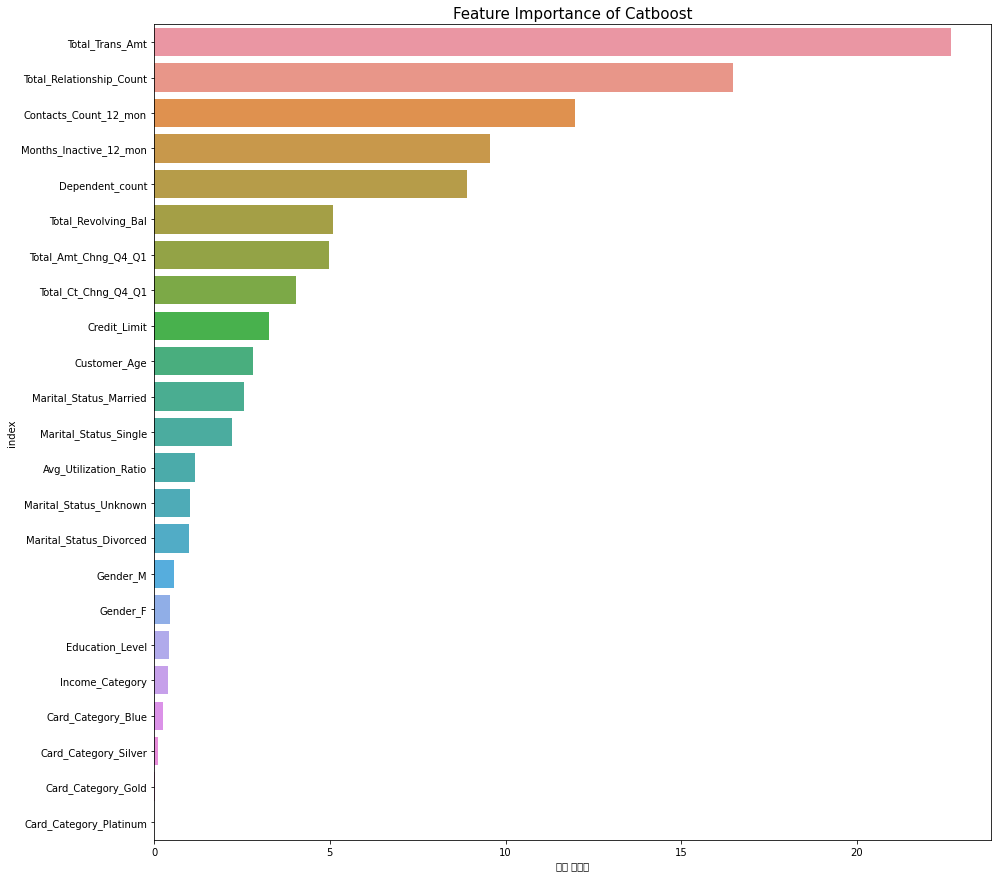

In [57]:
feature_imp=pd.DataFrame(model.feature_importances_,index=X.columns,columns=['특성 중요도']).sort_values(by='특성 중요도',ascending=False).reset_index()

plt.figure(figsize=(15,15))
plt.title('Feature Importance of Catboost',fontsize=15)
#plt.barh(feature_imp['index'],feature_imp['특성 중요도'])
sns.barplot(y='index',x='특성 중요도',data=feature_imp,orient='h')

In [40]:
feature_imp

,index,특성 중요도
0,Card_Category_Platinum,0.001802
1,Card_Category_Gold,0.031168
2,Card_Category_Silver,0.135212
3,Card_Category_Blue,0.170067
4,Income_Category,0.375150
5,Gender_F,0.395669
6,Education_Level,0.509040
7,Gender_M,0.633542
8,Marital_Status_Divorced,0.991522
9,Marital_Status_Unknown,1.063795


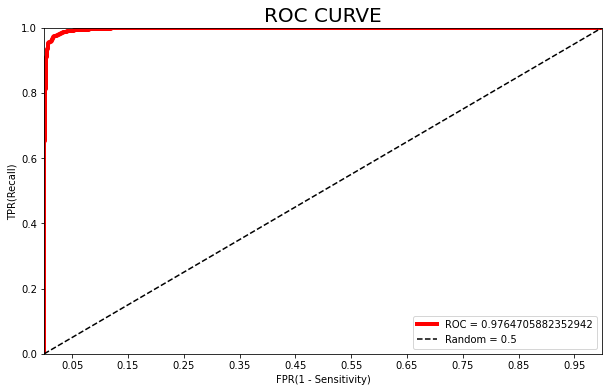

In [32]:
#모델평가
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_proba=model.predict_proba(X_test)[:,1]

def roc_curve_plot(y_test,pred_proba):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba)
    plt.figure(figsize=(10,6))
    plt.plot(fprs,tprs,label=f'ROC = {roc_auc_score(y_test,pred)}',linewidth=4,color='red')
    plt.plot([0,1],[0,1],'k--',label='Random = 0.5')
    
    start,end=plt.xlim()
    plt.title('ROC CURVE',fontsize=20)
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);
    plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y_test,pred_proba)

In [33]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

display(recall_score(y_test,pred))
display(f1_score(y_test,pred))
confusion_matrix(y_test,pred)

0.9741176470588235

0.9764150943396227

array([[1664,   36],
       [  44, 1656]], dtype=int64)

In [34]:
modelcol=['Total_Trans_Amt','Total_Relationship_Count','Contacts_Count_12_mon','Dependent_count','Months_Inactive_12_mon']

<AxesSubplot:>

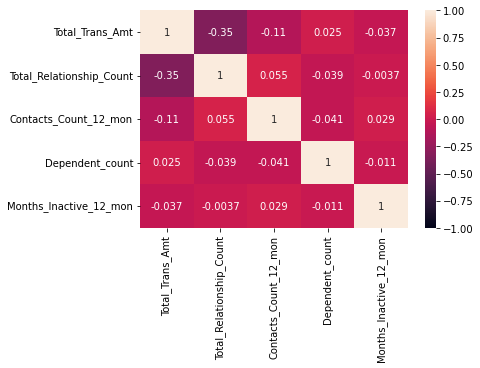

In [35]:
modelcor=data[modelcol].corr()

sns.heatmap(modelcor,annot=True,vmin=-1,vmax=1)

In [36]:
data2['Attrition_Flag']=data2['Attrition_Flag'].map(Attrition_Flag_cat)

In [37]:
import statsmodels.api as sm

model=sm.Logit(data2['Attrition_Flag'],data2[modelcol]).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.370384
         Iterations 7


In [38]:
#odds ratio
np.exp(model.params)

Total_Trans_Amt             0.999643
Total_Relationship_Count    0.567482
Contacts_Count_12_mon       1.474816
Dependent_count             1.000985
Months_Inactive_12_mon      1.334780
dtype: float64

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10122
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.1597
Time:                        10:13:35   Log-Likelihood:                -3750.9
converged:                       True   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                2.110e-307
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total_Trans_Amt             -0.0004   1.45e-05    -24.659      0.000      -0.000      -0.000
Total_Relationship_Count    -0.5665      0.019    -30.400      0.000      -0.603      -0.530
Contacts_Count_12_mon        0.3885      0.024     15.990      0.000       0.341       0.436
Dependent_count              0.0010      0.021      0.046      0.963      -0.041       0.043
Months_Inactive_12_mon       0.2888      0.026     11.318      0.000       0.239       0.339
============================================================================================
"""